# Reproduce on paper from S. Moret

In [2]:
# Packages

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [4]:
# Simulation Data

np.random.seed(42)
num_samples = 1000
num_features = 10

scenarios_data = np.random.rand(num_samples, num_features)
# random cost
cost_data = np.random.rand(num_samples) * 1000

In [6]:
# KMeans Clustering

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scenarios_data)
# label map to data in k means
scenarios_df = pd.DataFrame(scenarios_data, columns=[f'Feature_{i}' for i in range(num_features)])
scenarios_df['Cluster'] = cluster_labels
scenarios_df['Cost'] = cost_data


In [7]:
# Decision Tree Training to predict the cluster
X_train = scenarios_data
y_train = cluster_labels

decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)  # set the max depth to 5 to avoid overfitting and increase interpretability
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# TAC* computation
TAC_star = np.min(cost_data)

In [9]:
# Assume a TAC_lrd
TAC_lrd = 1.05 * TAC_star

In [10]:
# Regret Computation

regret = TAC_lrd - TAC_star
max_regret = np.max(regret)
expected_regret = np.mean(regret)

max_relative_regret = max_regret / TAC_star * 100
expected_relative_regret = expected_regret / TAC_star * 100

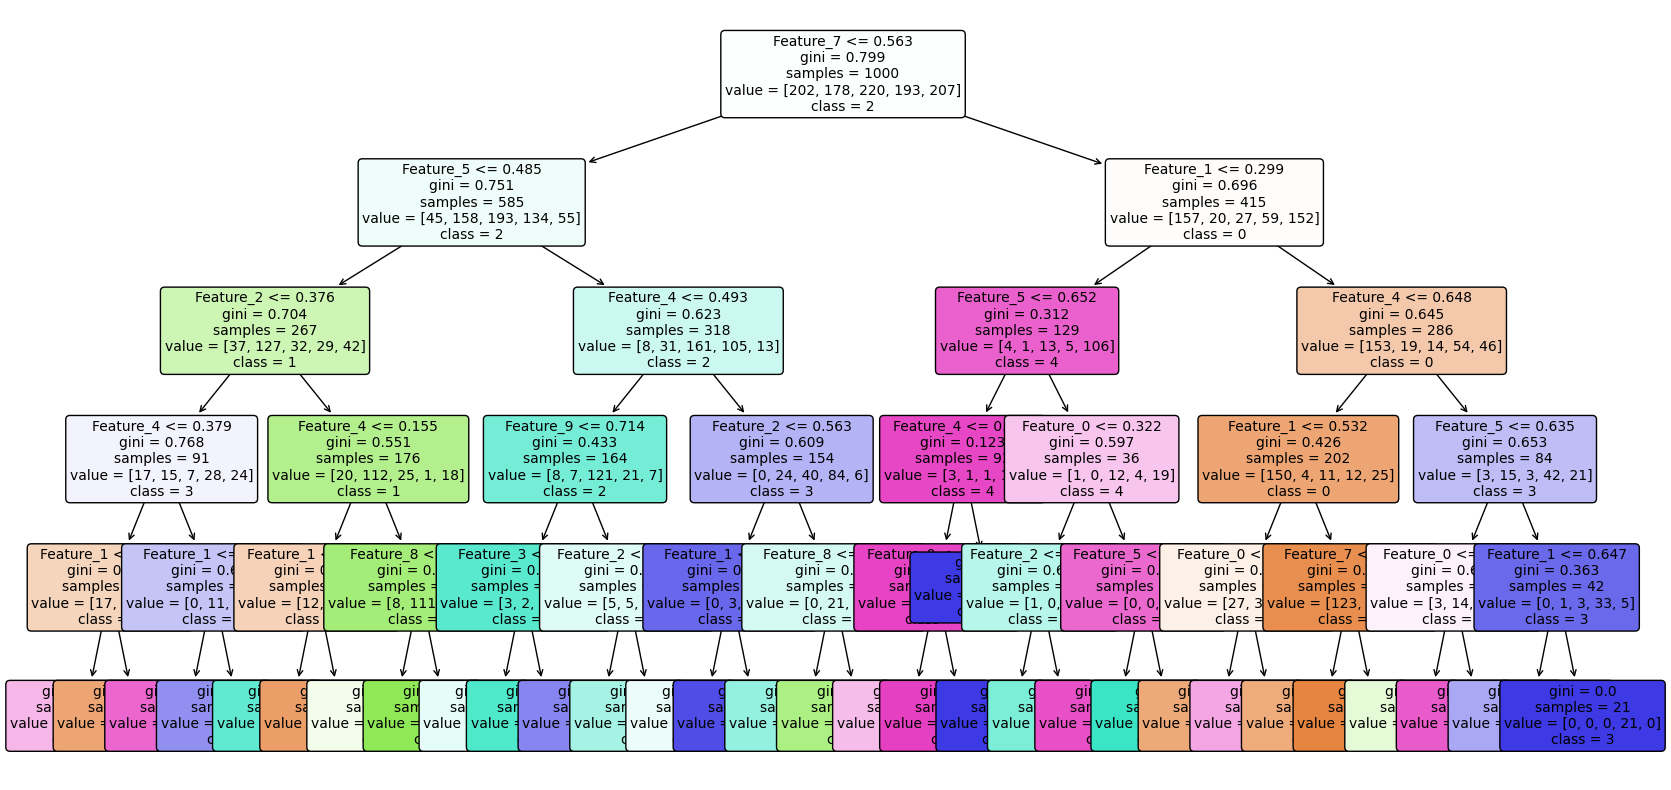

In [11]:
# visualize the decision tree

plt.figure(figsize=(20, 10)) 
plot_tree(decision_tree, feature_names=[f'Feature_{i}' for i in range(num_features)], class_names=[str(i) for i in range(num_clusters)], filled=True, rounded=True, fontsize=10)
plt.show()

In [12]:
print(f"(TAC*): {TAC_star:.2f}")
print(f"(TAC_lrd): {TAC_lrd:.2f}")
print(f"max_regret: {max_regret:.2f}")
print(f"expected_regret: {expected_regret:.2f}")
print(f"max_relative_regret: {max_relative_regret:.2f}%")
print(f"expected_relative_regret: {expected_relative_regret:.2f}%")

(TAC*): 0.94
(TAC_lrd): 0.99
max_regret: 0.05
expected_regret: 0.05
max_relative_regret: 5.00%
expected_relative_regret: 5.00%
